# IA 241 Final Project - Analyzing COVID-19 Data in Python

## Introduction 

According to the World Health Organization, COVID-19, a coronavirus, is an infectious disease caused by SARS-CoV-2 virus.

The COVID-19 outbreak began in December of 2019, and peaked in December of 2020, prior to the widespread distribution of vaccines, which brought about a gradual decline of the virus.

The virus had varying levels of effectiveness across different countries, and this study's particular focus is on South America, specifically Peru and Chile.



### Sources:

[COVID-19 Definition](https://www.who.int/health-topics/coronavirus)

[COVID-19 Background Information](https://www.cdc.gov/museum/timeline/covid19.html) 

## Data:

[CDC COVID-19 Data from 2020](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)

### Import pandas and matplot library

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Import CDC data from S3 bucket

In [54]:
!pip install xlrd
df = pd.read_excel('s3://blubaugh-241-python/covid_data.xls')
df.head()

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12 00:00:00,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-11-12 00:00:00,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-10-12 00:00:00,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


This data was obtained from the Centers for Disease Control and Prevention (CDC) at:
https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

## Analysis

### What was the average death rate in South America?

#### Adding a "death rate" column into the data

In [55]:
print(df.columns)

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')


In [56]:
df = df[df['cases']!= 0]

This eliminates instances where the number of cases was zero. This avoids an division by zero error in the next line of code.

In [57]:
df['death_rate_%'] = df['deaths']/df['cases']*100
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,death_rate_%
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779,0.804290
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776,3.020134
2,2020-12-12 00:00:00,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768,9.734513
3,2020-11-12 00:00:00,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266,15.873016
4,2020-10-12 00:00:00,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658,7.920792


The death_rate_% column has been created in the data frame.

#### Creating the "South America" continentExp

The dataset did not differentiate between North and South America in its 'continentExp' column. 

In order to answer the question of average death rate in South America, we had to change the label of South American countries from "America" to "South America".

For this study, the twelve countries considered part of South America are: Argentina, Bolivia, Brazil, Chile, Colombia, Ecuador, Guyana, Paraguay, Suriname, Uruguay, and Venezuela.

In [58]:
sadf = (df['continentExp'] == 'America') & (df['countriesAndTerritories'].isin(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']))
df.loc[sadf, 'continentExp'] = 'South America'

This code changes the 'continentExp' value for these countries from 'America' to 'South America'.

In [59]:
df.head(30400)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,death_rate_%
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779,0.804290
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776,3.020134
2,2020-12-12 00:00:00,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768,9.734513
3,2020-11-12 00:00:00,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266,15.873016
4,2020-10-12 00:00:00,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658,7.920792
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44931,30/06/2020,30,6,2020,2946,187,Peru,PE,PER,32510462.0,South America,151.868036,6.347590
44932,29/06/2020,29,6,2020,3430,182,Peru,PE,PER,32510462.0,South America,152.821575,5.306122
44933,28/06/2020,28,6,2020,3625,196,Peru,PE,PER,32510462.0,South America,156.432720,5.406897
44934,27/06/2020,27,6,2020,3762,178,Peru,PE,PER,32510462.0,South America,158.764277,4.731526


We were successful at converting the continentExp to 'South America' and keeping the countries not part of South America as 'America'.

#### Finding average death rate across continents

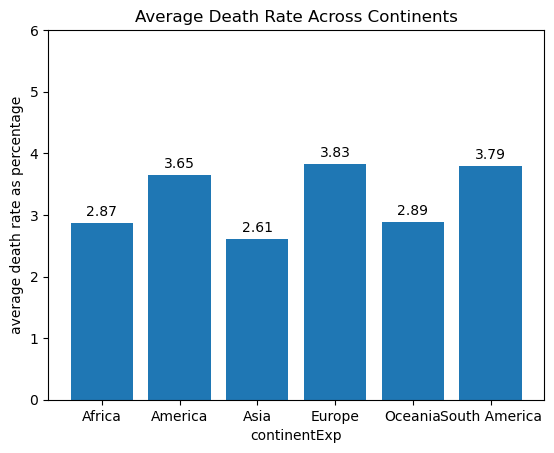

In [60]:
avg_death_rate_continent = df.groupby('continentExp')['death_rate_%'].mean()


avg_death_rate_continent = avg_death_rate_continent[avg_death_rate_continent.index != 'Other']

fig, ax = plt.subplots()
bars = ax.bar(avg_death_rate_continent.index, avg_death_rate_continent.values)

ax.set_title('Average Death Rate Across Continents')
ax.set_xlabel('continentExp')
ax.set_ylabel('average death rate as percentage')

#This code was written by OpenAI's ChatGPT, and was used to make the graph more accessible.
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.ylim(0.000, 6.000)

plt.show()

The average death rate in South America was 3.79%, the second highest following Europe.

### What was the average death rate in Chile and Peru?

Most of the code needed to answer this question has already been utilized above.

#### Finding the average death rate in Chile and Peru

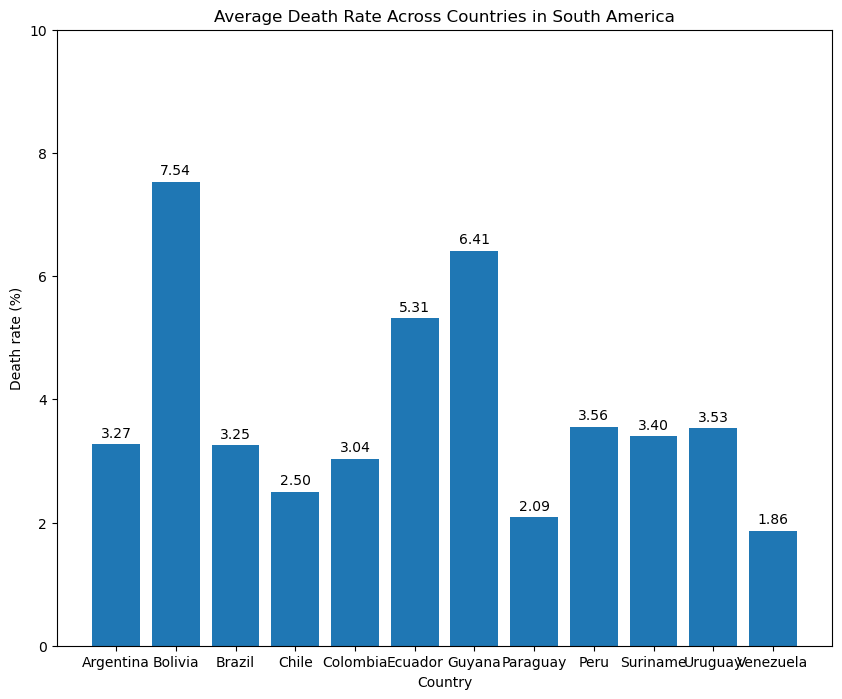

In [61]:
avg_death_rate_South_America = df.loc[df['continentExp'] == 'South America'].groupby('countriesAndTerritories')['death_rate_%'].mean()

plt.figure(figsize=(10, 8))
cpax = plt.axes()

cpbars = cpax.bar(avg_death_rate_South_America.index, avg_death_rate_South_America.values)

cpax.set_title('Average Death Rate Across Countries in South America')
cpax.set_xlabel('Country')
cpax.set_ylabel('Death rate (%)')

#This code was written by OpenAI's ChatGPT, and was used in order to make the graph more accessible.
for cpbar in cpbars:
    height = cpbar.get_height()
    cpax.annotate(f'{height:.2f}', xy=(cpbar.get_x() + cpbar.get_width() / 2, height),
                  xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
    
plt.ylim(0.000, 10.000)
plt.show()


Chile and Peru both have average death rates lower than South America as a whole.

South America's death rate is 3.79%.
Chile's average death rate is 2.50%.
Peru's average death rate is 3.56%.

As this graph shows, countries such as Guyana, Ecuador, and Bolivia bring the average for South America up significantly.

Peru's average is very close to several other countries, while Chile's is noticeably lower.

### In what month was the peak of the death rate in Chile and Peru?

#### Chile data

In [62]:
chile_data = df.loc[df['countriesAndTerritories'] == 'Chile']
chile_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,death_rate_%
11813,14/12/2020,14,12,2020,2138,40,Chile,CL,CHL,18952035.0,South America,113.386241,1.870907
11814,13/12/2020,13,12,2020,1807,64,Chile,CL,CHL,18952035.0,South America,109.961806,3.541782
11815,2020-12-12 00:00:00,12,12,2020,1534,8,Chile,CL,CHL,18952035.0,South America,109.492200,0.521512
11816,2020-11-12 00:00:00,11,12,2020,1662,84,Chile,CL,CHL,18952035.0,South America,109.634665,5.054152
11817,2020-10-12 00:00:00,10,12,2020,1244,10,Chile,CL,CHL,18952035.0,South America,109.149229,0.803859


Created the chile_data variable

#### Peru data

In [63]:
peru_data = df.loc[df['countriesAndTerritories'] == 'Peru']
peru_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,death_rate_%
44764,14/12/2020,14,12,2020,1928,68,Peru,PE,PER,32510462.0,South America,69.033162,3.526971
44765,13/12/2020,13,12,2020,2102,65,Peru,PE,PER,32510462.0,South America,69.752931,3.092293
44766,2020-12-12 00:00:00,12,12,2020,1832,45,Peru,PE,PER,32510462.0,South America,69.574527,2.456332
44767,2020-11-12 00:00:00,11,12,2020,1799,44,Peru,PE,PER,32510462.0,South America,70.020537,2.445803
44768,2020-10-12 00:00:00,10,12,2020,691,54,Peru,PE,PER,32510462.0,South America,70.294295,7.814761


Created the peru_data variable

#### Chile and Peru Death Rate by Month

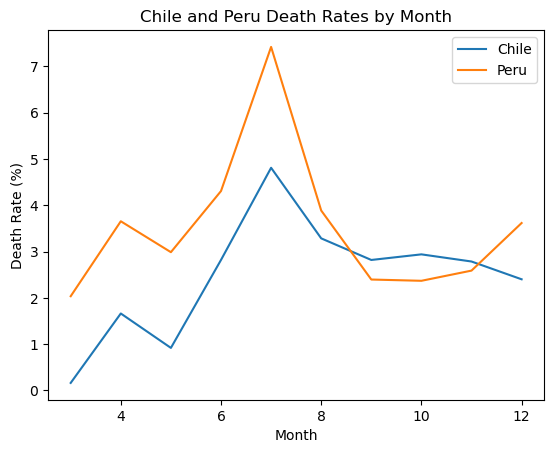

In [64]:
death_rate_chile_peru = df.groupby(['countriesAndTerritories', 'month'])['death_rate_%'].mean()

chile_death_rate = death_rate_chile_peru['Chile']
peru_death_rate = death_rate_chile_peru['Peru']

plt.plot(chile_death_rate.index, chile_death_rate.values, label='Chile')
plt.plot(peru_death_rate.index, peru_death_rate.values, label='Peru')

plt.xlabel('Month')
plt.ylabel('Death Rate (%)')
plt.title('Chile and Peru Death Rates by Month')
plt.legend()
plt.show()

In both Chile and Peru, the death rate began increasing in May of 2020, and peaked in July.

Further research revealed that several different factors are likely responsible for this: 

First, the reporting guidelines for deaths due to COVID-19 were very fluid in both of these countries. This may have led to inconsistent reporting which was then reflected in the dataset.

Second, arbitrary death reporting may have also been a political play by the health ministers and government in order to make it seem as though they were dealing with the pandemic adequately.

Third, Peru had imposed a strict lockdown that ended in June of 2020. After June 2020 and into July, there is a spike in the death rate. This demonstrates a correlation between the death rate and the end of the lockdown. Conversly, Chile's health minister at the time would not impose strict lockdowns and preferred to maintain normal procedure. This is a possible explanation for why Chile's increase in death rate is more consistent than Peru's.

Sources: https://www.bbc.com/news/world-latin-america-53150808 and https://www.aljazeera.com/news/2020/6/13/chile-health-minister-resigns-amid-coronavirus-row-live-updates

## Conclusion

South America saw the second highest average death rate (3.79%) from COVID-19 in 2020.

The death rates of Chile (2.50%) and Peru (3.56%), two neighboring countries within South America, had a lower average death rate than South America as a whole, but were nevertheless hit hard by the virus.

The peak in death rate for both of these countries was in July, with Chile seeing a consistent increase in rate from May to July, and Peru seeing a sharp spike from June to July.

While the difference in death rate between Peru and Chile was significant, both rates varied together.  

### Limitations

We were limited in the number of the sources we had access to because many sources on this topic were in Spanish, which neither of us can read.

### Suggestions

Future analyses could include data from 2021, after the vaccines were beginning to be distributed. This could show the effectiveness of the vaccine and its implementation across different countries.

## Authors: 
    Colin Lafley and Luke Blubaugh, Intelligence Analysis
    James Madison University, Class of 2025
    May 05, 2023